## Using India's environment data to see the impact of renewable energy adoption, increase industrialization and Co2 emisssions.

### 1. Renewable Energy Sources Adoption, Industrialization based GDP and their effect on Co2 emissions
Null Hypothesis 1:
Increased adopotion of renewable energy sources should lead to lesser emission of CO2 gases and we beleive, they are inversely related. Although the absolute increase in reneable energy addition is not considered, however, a relative % of total energy consumption is what is consider vis-a-vis C02 emissions. We would like to see if there is a strong inverse relationship between co2 missions and renewale energy production.

Null Hypothesis 2:
If GDP was largely agrarian, then increase in GDP will not lead to increased Co2 emission.
on the contrary if industrialization drove GDP we suspect a linear or a higher order relationship between GDP and Co2 emissions.

### 2. Data Sources: 
<a href='https://www.macrotrends.net/countries/IND/india/gdp-gross-domestic-product'>India GDP 1960-2020</a>

https://www.macrotrends.net/countries/IND/india/renewable-energy-statistics

https://www.macrotrends.net/countries/IND/india/carbon-co2-emissions

https://www.macrotrends.net/countries/IND/india/ghg-greenhouse-gas-emissions

In [72]:
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [73]:
df_co2=pd.read_csv('india-carbon-co2-emissions.csv',skiprows=16,sep=',')
df_rengy=pd.read_csv('india-renewable-energy-statistics.csv',sep=',',skiprows=16)
df_mfg=pd.read_csv("india-manufacturing-output.csv",skiprows=16,sep=',')
#df_co2.head()
#df_mfg.head()

In [74]:
## renaming column names to shorter ones and removing the empty last col.
df_co2.columns = ['date', 'Co2 (kTons)', 'Per Capita (mTons)', 'Empty']
#df_co2.head(),df_co2.tail()
df_co2=df_co2.drop(columns=['Empty'])
#df_co2.head(),df_co2.tail(),df_co2['date']

## cleaning up manufacturing data
df_mfg.columns = ['date', 'GDP', '%GDP change', 'Empty']
df_mfg=df_mfg.drop(columns=['Empty'])

## cleaning up renewable energy data 
df_rengy.columns = ['date', '% Renewables', 'Annual Change', 'Empty']
df_rengy=df_rengy.drop(columns=['Empty'])

In [75]:
# creating a new column year from date:
# setting index to year for joining later 

df_co2['year'] = pd.DatetimeIndex(df_co2['date']).year
df_co2.set_index('year')

# setting index to year for joining later 

df_mfg['year'] = pd.DatetimeIndex(df_mfg['date']).year
df_mfg.set_index('year')

# setting index to year for joining later 

df_rengy['year'] = pd.DatetimeIndex(df_rengy['date']).year
df_rengy.set_index('year')

,date,% Renewables,Annual Change
year,,,
1990,1990-12-31,24.4893,NaN
1991,1991-12-31,22.8074,-1.68
1992,1992-12-31,20.7527,-2.05
1993,1993-12-31,19.5588,-1.19
1994,1994-12-31,21.2191,1.66
1995,1995-12-31,17.2605,-3.96
1996,1996-12-31,15.7673,-1.49
1997,1997-12-31,16.0151,0.25
1998,1998-12-31,16.7011,0.69


In [76]:
## joining both the data sets - with inner join
df_co2=df_co2.merge(df_rengy[['year','% Renewables','Annual Change']],how='inner').fillna("")
df_co2.head()
df_co2.set_index('year')
df_co2=df_co2.merge(df_mfg[['year','GDP', '%GDP change']],how='inner').fillna("")
df_co2.head()
df_co2.set_index('year')

,date,Co2 (kTons),Per Capita (mTons),% Renewables,Annual Change,GDP,%GDP change
year,,,,,,,
1990,1990-12-31,619154.615,0.7090,24.4893,,53.274803,16.5976
1991,1991-12-31,658189.830,0.7385,22.8074,-1.68,42.342416,15.6763
1992,1992-12-31,699087.881,0.7688,20.7527,-2.05,45.539237,15.8008
1993,1993-12-31,723697.118,0.7803,19.5588,-1.19,44.451951,15.9157
1994,1994-12-31,764730.848,0.8087,21.2191,1.66,54.864931,16.7641
1995,1995-12-31,811562.105,0.8419,17.2605,-3.96,64.367435,17.8659
1996,1996-12-31,882324.204,0.8982,15.7673,-1.49,69.135505,17.5963
1997,1997-12-31,917685.085,0.9169,16.0151,0.25,68.695442,16.5186
1998,1998-12-31,936221.770,0.9183,16.7011,0.69,66.233570,15.7193


In [77]:
df_co2.set_index('year')

,date,Co2 (kTons),Per Capita (mTons),% Renewables,Annual Change,GDP,%GDP change
year,,,,,,,
1990,1990-12-31,619154.615,0.7090,24.4893,,53.274803,16.5976
1991,1991-12-31,658189.830,0.7385,22.8074,-1.68,42.342416,15.6763
1992,1992-12-31,699087.881,0.7688,20.7527,-2.05,45.539237,15.8008
1993,1993-12-31,723697.118,0.7803,19.5588,-1.19,44.451951,15.9157
1994,1994-12-31,764730.848,0.8087,21.2191,1.66,54.864931,16.7641
1995,1995-12-31,811562.105,0.8419,17.2605,-3.96,64.367435,17.8659
1996,1996-12-31,882324.204,0.8982,15.7673,-1.49,69.135505,17.5963
1997,1997-12-31,917685.085,0.9169,16.0151,0.25,68.695442,16.5186
1998,1998-12-31,936221.770,0.9183,16.7011,0.69,66.233570,15.7193


In [78]:
def calc_lag(series):
    s=series.copy()
    len(series)
    s1=[]
    for i in range(1,len(series)):
        s[0]=0
        s[i] = series[i] - series[i-1]
    return s  

###############
df_co2['ren_lag']=calc_lag(df_co2['% Renewables'])
df_co2['Co2_lag']=calc_lag(df_co2['Co2 (kTons)'])

# hypothesis 1 - Adoption of Renewable energy doesn't reduce pollution

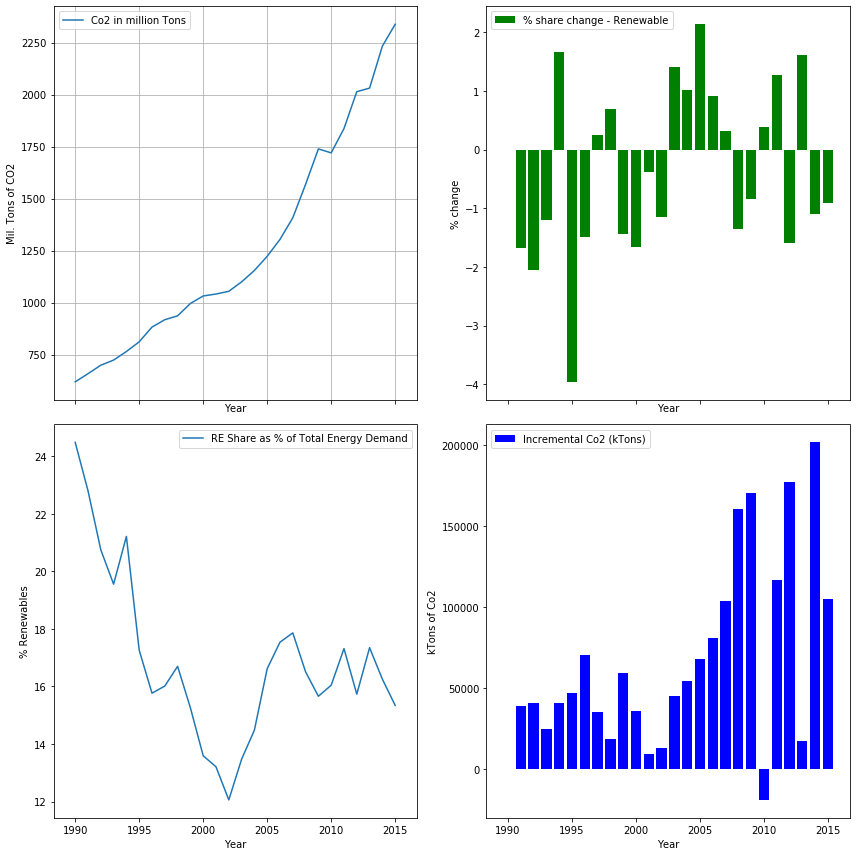

In [79]:
# Plot vs. date (Year)
## plotting part
fig, axs = plt.subplots(2, 2,sharex=True, figsize=(12, 12))

axs[0,0].plot(df_co2['year'],df_co2['Co2 (kTons)']/1000,label='Co2 in million Tons')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Mil. Tons of CO2')
axs[0,0].grid(True)
leg=axs[0,0].legend()

axs[1,0].plot(df_co2['year'],df_co2['% Renewables'],label='RE Share as % of Total Energy Demand')
axs[1,0].set_ylabel('% Renewables')
axs[1,0].set_xlabel('Year')
leg=axs[1,0].legend()

axs[0,1].bar(df_co2['year'],df_co2['ren_lag'],label='% share change - Renewable', color='g')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('% change')
leg=axs[0,1].legend()


axs[1,1].bar(df_co2['year'],df_co2['Co2_lag'],label='Incremental Co2 (kTons)', color='b')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('kTons of Co2')
leg=axs[1,1].legend()

plt.tight_layout()

## Hypothesis 2 - GDP is driven by industrialization leading more pollution in the last 25 years.

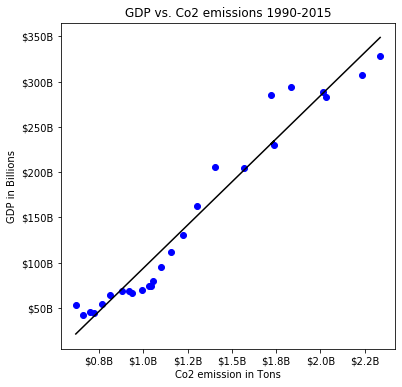

In [80]:
# Function to format axis values to thousands
def conv2_thousands(y, pos):
    return '$%1.0fK' % (y/1000)

# Function to format axis values to millions
def conv2_millions(y, pos):
    return '$%1.1fB' % (y/1000000)

# Function to format axis values to billion
def in_billions(y, pos):
    return '$%1.0fB' % (y)

fig,ax=plt.subplots(1,1,figsize=(6,6))
# Plot to see if correlation exists between family income from Ann Arbor and Michigan
x1 = df_co2['Co2 (kTons)'].copy()
y1 = df_co2['GDP'].copy()
fit1 = np.polyfit(x1, y1, 1)
fit1_fn = np.poly1d(fit1)
ax.plot(x1, y1, 'bo', x1, fit1_fn(x1), '-k')
ax.set_title('GDP vs. Co2 emissions 1990-2015')
ax.set_xlabel('Co2 emission in Tons')
ax.set_ylabel('GDP in Billions')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(in_billions))
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(conv2_millions))